Starting simulation at t=0. s for a duration of 2. s
2. s (100%) simulated in 1s


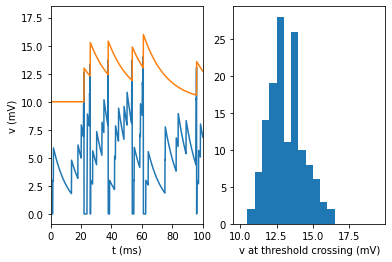

In [2]:
from brian2 import *

prefs.codegen.target = "numpy"

eqs = '''
dv/dt = -v/(10*ms) : volt
dvt/dt = (10*mV-vt)/(15*ms) : volt
'''

reset = '''
v = 0*mV
vt += 3*mV
'''

IF = NeuronGroup(1, model=eqs, reset=reset, threshold='v>vt',
                 method='exact')
IF.vt = 10*mV
PG = PoissonGroup(1, 500 * Hz)

C = Synapses(PG, IF, on_pre='v += 3*mV')
C.connect()

Mv = StateMonitor(IF, 'v', record=True)
Mvt = StateMonitor(IF, 'vt', record=True)
# Record the value of v when the threshold is crossed
M_crossings = SpikeMonitor(IF, variables='v')
run(2*second, report='text')

subplot(1, 2, 1)
plot(Mv.t / ms, Mv[0].v / mV)
plot(Mvt.t / ms, Mvt[0].vt / mV)
ylabel('v (mV)')
xlabel('t (ms)')
# zoom in on the first 100ms
xlim(0, 100)
subplot(1, 2, 2)
hist(M_crossings.v / mV, bins=np.arange(10, 20, 0.5))
xlabel('v at threshold crossing (mV)')
show()